## Importing all Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
import matplotlib
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.preprocessing import LabelEncoder




## Locating Dataset

In [2]:
data = pd.read_csv("Train.csv")

## Describing Dataset


In [3]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Showing information of dataset

In [4]:
data.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

## Checking if dataset contains any null value

In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Handling missing data in loan dataset with mean imputation

In [6]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mean())

In [7]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [8]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

## Imputing missing values with mode in loan dataset

In [9]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [10]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Gender distribution graph

Text(0.5, 1.0, 'Gender Distribution')

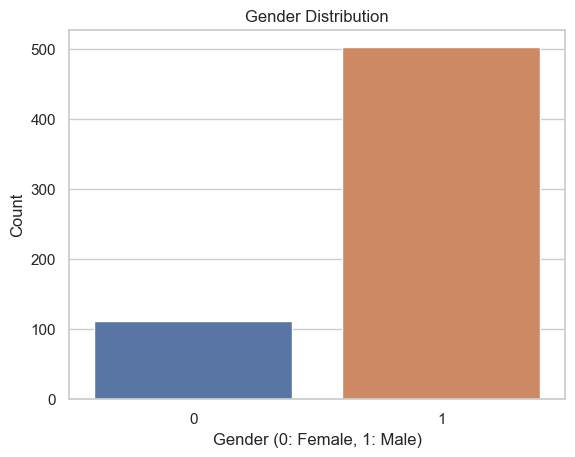

In [11]:
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})
sns.set(style="whitegrid")
sns.countplot(x="Gender", data=data)
plot.xlabel("Gender (0: Female, 1: Male)")
plot.ylabel("Count")
plot.title("Gender Distribution")


## Martial status graph

Text(0.5, 1.0, 'Marital Status Distribution')

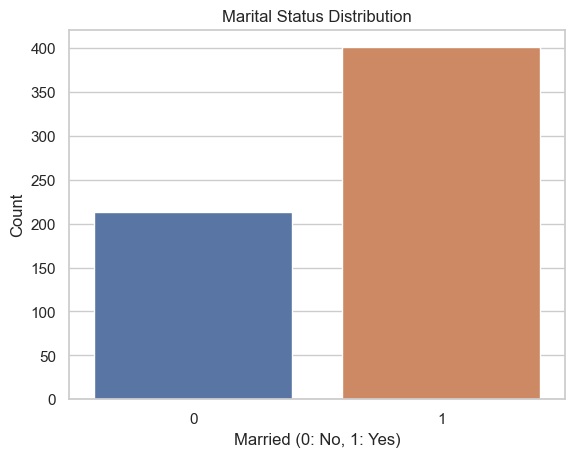

In [12]:
data['Married'] = data['Married'].replace({'Yes': 1, 'No': 0})
sns.set(style="whitegrid")
sns.countplot(x="Married", data=data)
plot.xlabel("Married (0: No, 1: Yes)")
plot.ylabel("Count")
plot.title("Marital Status Distribution")


## depedents graph

Text(0.5, 1.0, 'Dependents Distribution')

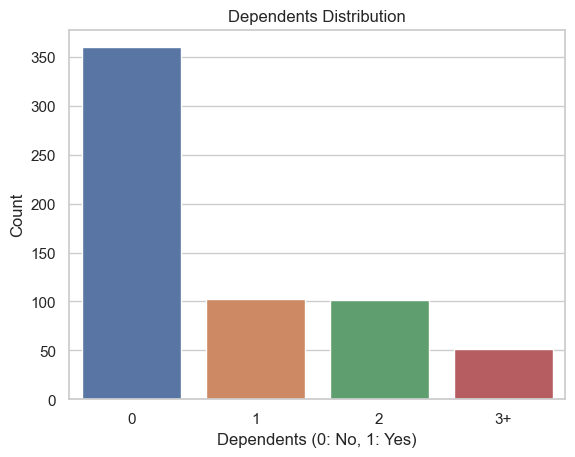

In [13]:
sns.set(style="whitegrid")
sns.countplot(x="Dependents", data=data)
plot.xlabel("Dependents (0: No, 1: Yes)")
plot.ylabel("Count")
plot.title("Dependents Distribution")

## Education status graph

Text(0.5, 1.0, 'Education Distribution')

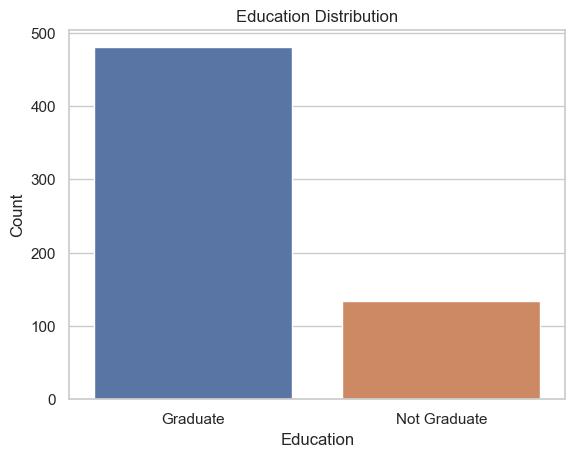

In [14]:
sns.set(style="whitegrid")
sns.countplot(x="Education", data=data)
plot.xlabel("Education")
plot.ylabel("Count")
plot.title("Education Distribution")

## Employement status graph

Text(0.5, 1.0, 'Self Employed Distribution')

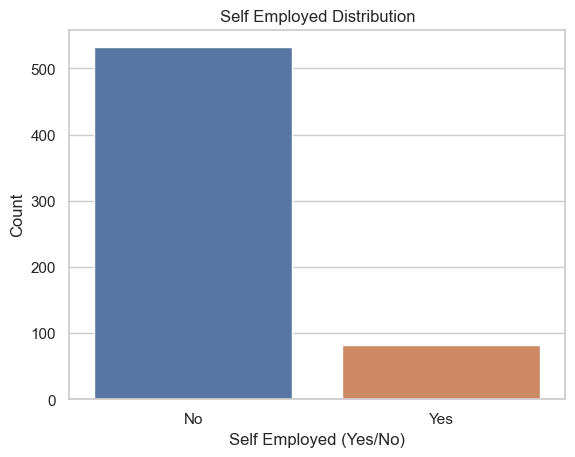

In [15]:
sns.set(style="whitegrid")
sns.countplot(x="Self_Employed", data=data)
plot.xlabel("Self Employed (Yes/No)")
plot.ylabel("Count")
plot.title("Self Employed Distribution")

## Property area graph

Text(0.5, 1.0, 'Property Area Distribution')

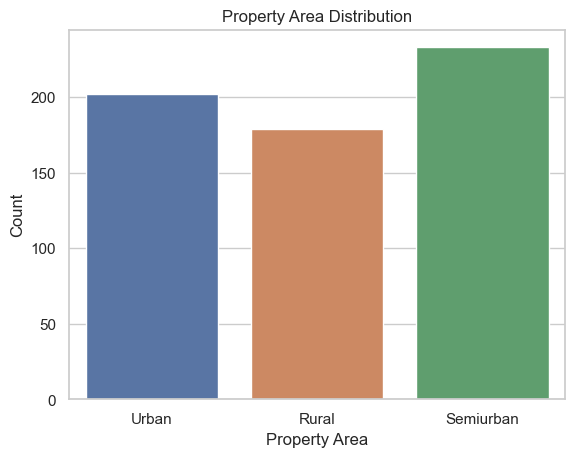

In [16]:
sns.set(style="whitegrid")
sns.countplot(x="Property_Area", data=data)
plot.xlabel("Property Area")
plot.ylabel("Count")
plot.title("Property Area Distribution")

## Loan status graph

Text(0.5, 1.0, 'Loan Status Distribution')

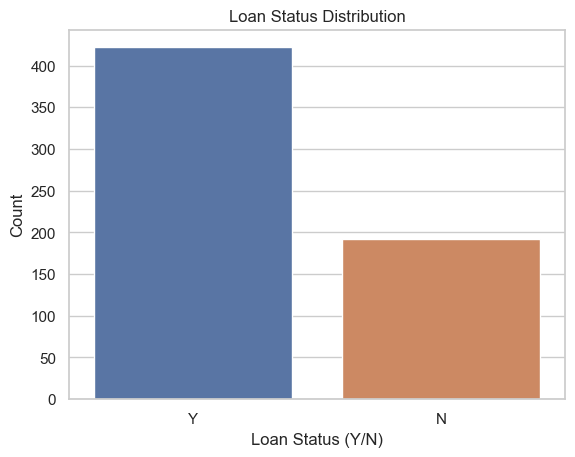

In [17]:
sns.set(style="whitegrid")
sns.countplot(x="Loan_Status", data=data)
plot.xlabel("Loan Status (Y/N)")
plot.ylabel("Count")
plot.title("Loan Status Distribution")

## Adding new column(Total_Income)

In [18]:
data['Total_Income'] = data['ApplicantIncome']+data['CoapplicantIncome']
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,1,0,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,1,1,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,1,1,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,1,1,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,1,0,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


## Distribution of applicant income

Text(0, 0.5, 'Frequency')

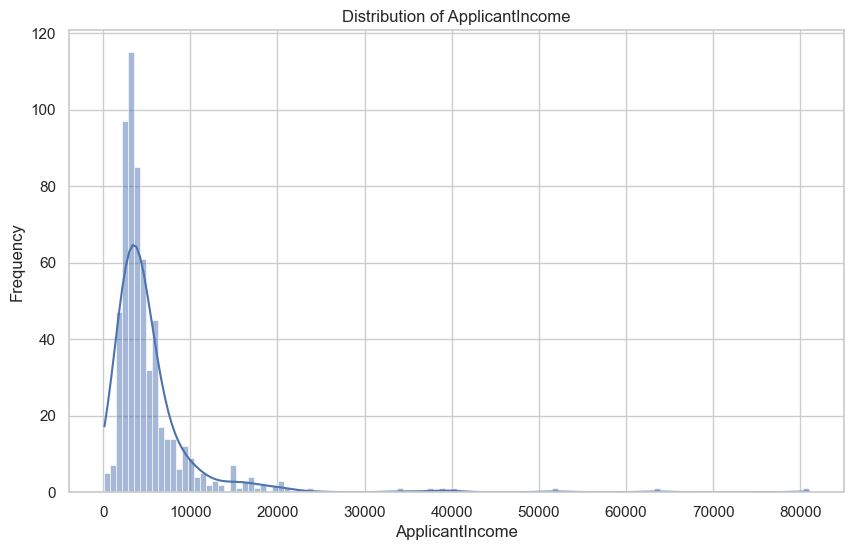

In [19]:
data['ApplicantIncome_log'] = np.log(data["ApplicantIncome"])
plot.figure(figsize=(10, 6))  
sns.histplot(data['ApplicantIncome'], kde=True)  
plot.title('Distribution of ApplicantIncome')
plot.xlabel('ApplicantIncome')
plot.ylabel('Frequency')

## Distribution of coapplicantIncome_log

In [20]:
sns.set(style="whitegrid")
sns.displot(data['CoapplicantIncome_log'], kde=False, bins=20)  
plot.xlabel("CoapplicantIncome_log")
plot.ylabel("Frequency")
plot.title("Distribution of CoapplicantIncome_log")

KeyError: 'CoapplicantIncome_log'

## Distribution of loan amount

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(16.694444444444443, 0.5, 'Frequency')

<Figure size 1000x600 with 0 Axes>

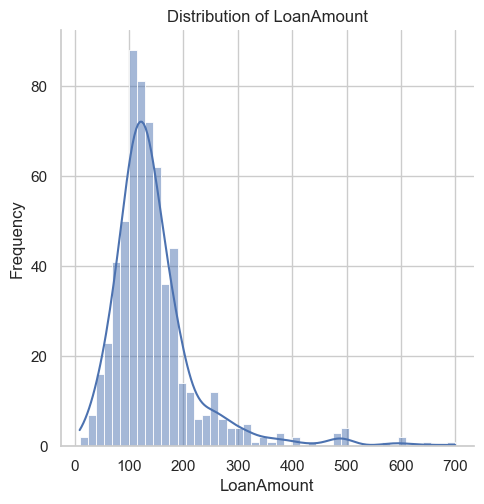

In [21]:
data['LoanAmount_log'] = np.log(data["LoanAmount"])
plot.figure(figsize=(10, 6))  
sns.displot(data['LoanAmount'], kde=True)  
plot.title('Distribution of LoanAmount')
plot.xlabel('LoanAmount')
plot.ylabel('Frequency')

## Distribution of loan amount term

C:\Users\shubh\AppData\Local\Temp\ipykernel_15292\3430608622.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Loan_Amount_Term'])


<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

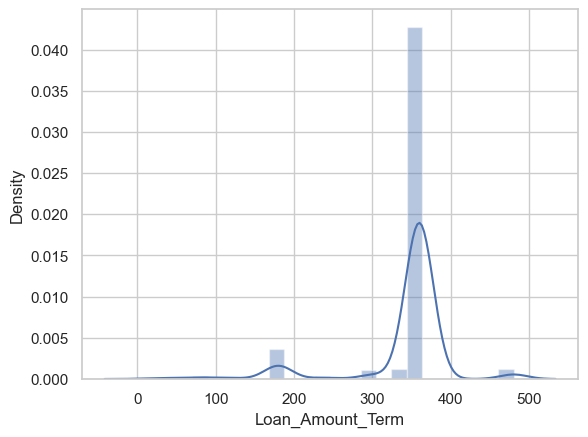

In [22]:
data['Loan_Amount_Term_log'] = np.log(data["Loan_Amount_Term"])
sns.distplot(data['Loan_Amount_Term'])

## Distribution of total income

Text(0, 0.5, 'Frequency')

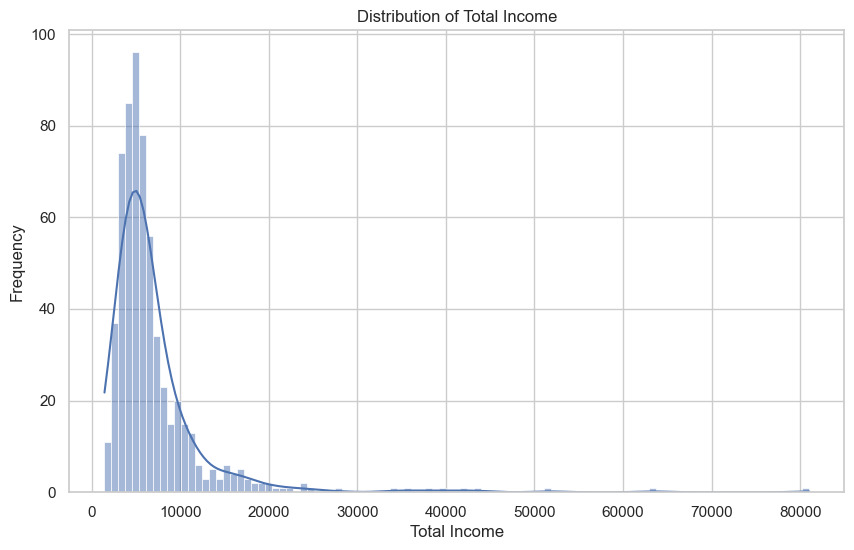

In [23]:
data['Total_Income_log'] = np.log(data["Total_Income"])
plot.figure(figsize=(10, 6))  
sns.histplot(data['Total_Income'], kde=True)  
plot.title('Distribution of Total Income')
plot.xlabel('Total Income')
plot.ylabel('Frequency')

In [24]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_Income_log
0,LP001002,1,0,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,4.986426,5.886104,8.674026
1,LP001003,1,1,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,4.852030,5.886104,8.714568
2,LP001005,1,1,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,4.189655,5.886104,8.006368
3,LP001006,1,1,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,4.787492,5.886104,8.505323
4,LP001008,1,0,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,4.948760,5.886104,8.699515


## dropping unnecessary columns

In [25]:
col = ['ApplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID','CoapplicantIncome_log']
data = data.drop(columns = col , axis = 1)

KeyError: "['CoapplicantIncome_log'] not found in axis"

In [26]:
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_Income_log
0,LP001002,1,0,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,4.986426,5.886104,8.674026
1,LP001003,1,1,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,4.852030,5.886104,8.714568
2,LP001005,1,1,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,4.189655,5.886104,8.006368
3,LP001006,1,1,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,4.787492,5.886104,8.505323
4,LP001008,1,0,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,4.948760,5.886104,8.699515


## Encoding categorical variables

In [27]:
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
l = LabelEncoder()
for c in cols:
    data[c] = l.fit_transform(data[c])


In [28]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_Income_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0,8.674026,4.986426,5.886104,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0,8.430109,4.852030,5.886104,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0,8.006368,4.189655,5.886104,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0,7.856707,4.787492,5.886104,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0,8.699515,4.948760,5.886104,8.699515


## Defining features and target variable

In [29]:
X = data.drop(columns = ['Loan_Status'],axis = 1)
Y = data['Loan_Status']

## Splitting data into training and testing sets

In [30]:
X_Train , X_Test,Y_Train,Y_Test = train_test_split(X,Y , test_size = 0.25,random_state = 38)

## Evaluating model performance

In [31]:
def clfy(model, X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.25, random_state=38)
    model.fit(X_Train, Y_Train)
    accuracy = model.score(X_Test, Y_Test) * 100
    print("Accuracy =", accuracy)
    scores = cross_val_score(model, X, Y, cv=5)
    mean_cv_score = np.mean(scores) * 100
    print("Cross-validation score =", mean_cv_score)

In [32]:
model = LogisticRegression()
clfy(model,X,Y)

ValueError: could not convert string to float: 'LP001691'

In [33]:
model = DecisionTreeClassifier()
clfy(model , X,Y)

ValueError: could not convert string to float: 'LP001691'

In [34]:
model = LogisticRegression()
model.fit(X_Train , Y_Train)

ValueError: could not convert string to float: 'LP001691'

## Confusion matrix for model evaluation

In [35]:
Y_Predict = model.predict(X_Test)
Mtrix  = confusion_matrix(Y_Test , Y_Predict)
Mtrix

ValueError: could not convert string to float: 'LP001843'